## KNN implementation using python

Step 1: Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

Step 2: Read the dataset and divide it into feature matrix and label

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv')
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv'

In [4]:
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

Step 3: Train and Test split

The next step is to split our data in two different chunks, one will be used to train our data and one will be use to test the results of our model.

A usual setup is to use 25% of the data set for test and 75% for train.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Step 4: Pre-processing the data

In order to resolve this magnitude problem, we have to scale the attributes. For this we used the StandardScaler from sklearn.

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step 5: Fit the model

Here, n_neighbors: the value of k, the number of neighbors considered

In [7]:
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Step 6: Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)

Step 7: Evaluate our model

We will do this by creating a confusion matrix

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_score_package = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_package)

Accuracy: 0.9
Precision: 0.9230769230769231
Recall: 0.75
F1 Score: 0.8275862068965517


Visualising the Test set results

<ipython-input-11-57ad40d9b164>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


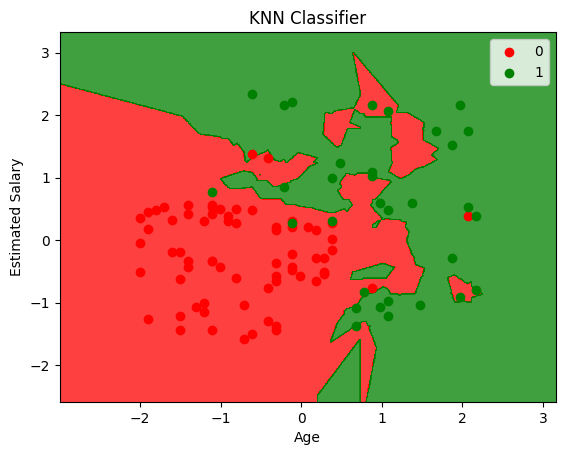

In [11]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()